In [1]:
from Qutrit import Qutrit
from qiskit import *
from qiskit.visualization import array_to_latex
import seaborn as sns
import numpy as np

In [2]:
tamil = Qutrit(2)
tamil.XP1(0)
tamil.H(0)
tamil.H(1)
tamil.draw()

|0>—X+1— H —————
|0>— H —————————


# Controlled X+1 Gate As Adder

In [3]:
q_add = Qutrit(4)
q_add.XM1(0)
q_add.XP1(1)
q_add.XM1(2)

for i in range(3):
    q_add.CX(i, 3)

q_add.draw()

|0>—X-1————— * —————————————————————
|0>—X+1——————|—————— * —————————————
|0>—X-1——————|———————|—————— * —————
|0>——————————X———————X———————X——————


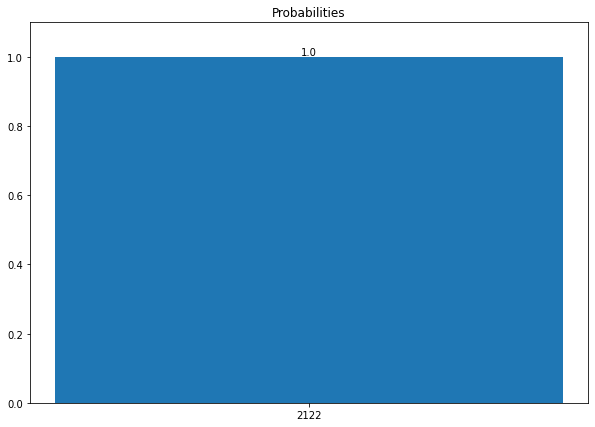

In [4]:
q_add.get_probs(f_size = 15)

# Quantum Phase Kickback

In [7]:
phase_kick = Qutrit(2)
phase_kick.H(0)
phase_kick.XP1(1)
phase_kick.H(1)
phase_kick.barrier()
phase_kick.CX(0, 1)
phase_kick.draw()

|0>— H —————————|————— * —————
|0>—X+1— H —————|——————X——————


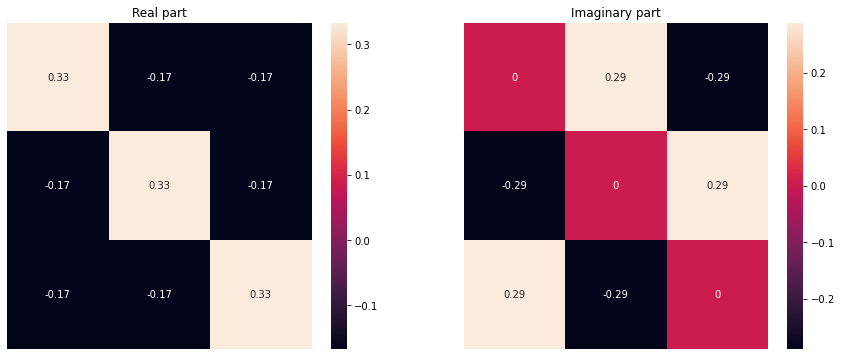

In [6]:
phase_kick.plot_density([0])

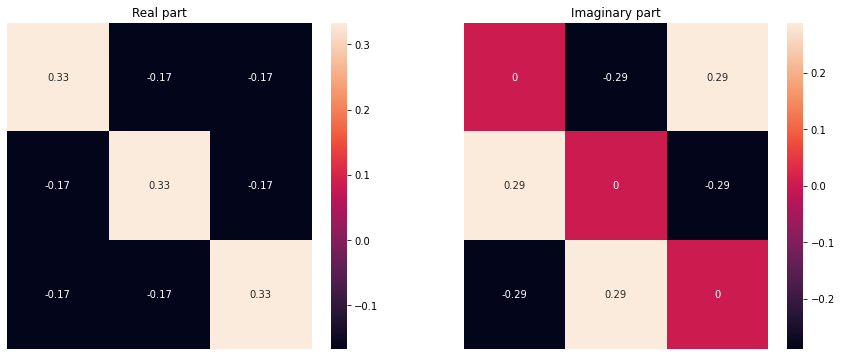

In [7]:
phase_kick.plot_density([1])

# Deutsch Josza Algorithm

In [22]:
q_dj = Qutrit(3)
q_dj.XP1(2)
q_dj.barrier()
for i in range(3): q_dj.H(i)
q_dj.CX(0, 2)
q_dj.CX(1, 2)
for i in range(3): q_dj.H_DAG(i)
print("DJ Algorithm\n")
q_dj.draw()

DJ Algorithm

|0>—————————|— H ————— * —————————H_d—————
|0>—————————|— H ——————|—————— * —H_d—————
|0>—X+1—————|— H ——————X———————X——H_d—————


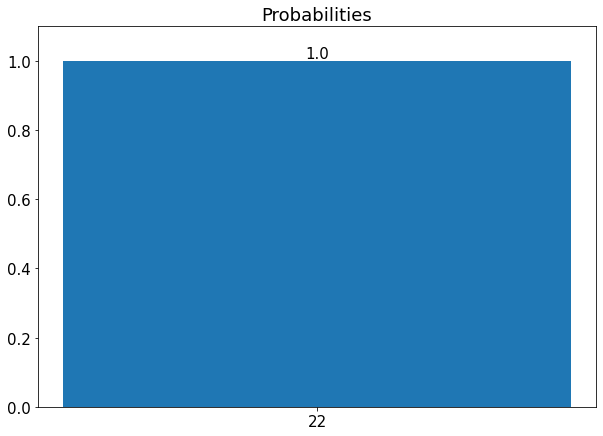

In [23]:
q_dj.get_probs(p_q = [0], f_size = 15)

# Simon's Algorithm

In [25]:
q_sim = Qutrit(4)
for i in range(2): q_sim.H(i)
for i in range(2): q_sim.CX(i, i + 2)
q_sim.CX_DAG(0, 2)
q_sim.CX_DAG(0, 3)
# q_sim.CX_DAG(0, 5)
for i in range(2): q_sim.H_DAG(i)
q_sim.draw()

|0>— H ————— * ————————————— * ————— * —H_d—————
|0>— H ——————|—————— * ——————|———————|——H_d—————
|0>——————————X———————|——————X_d——————|——————————
|0>——————————————————X——————————————X_d—————————


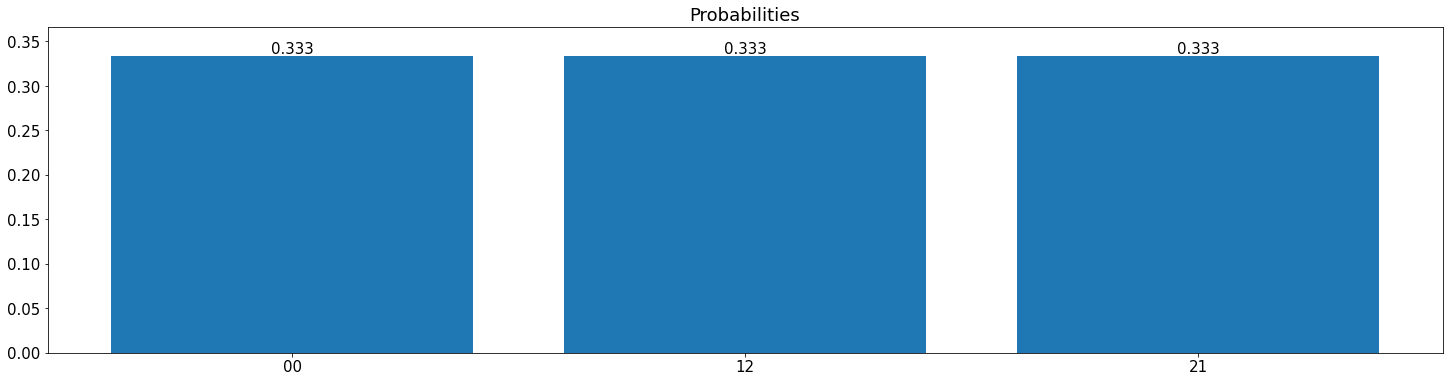

In [26]:
q_sim.get_probs(x_l = 25, y_l = 6, p_q = [0, 1], f_size = 15)

# Measurement using the method 'measure'

In [12]:
simple = Qutrit(2)
simple.H(0)
simple.XM1(1)
simple.CX(0, 1)
simple.draw()

|0>— H ————— * —————
|0>—X-1——————X——————


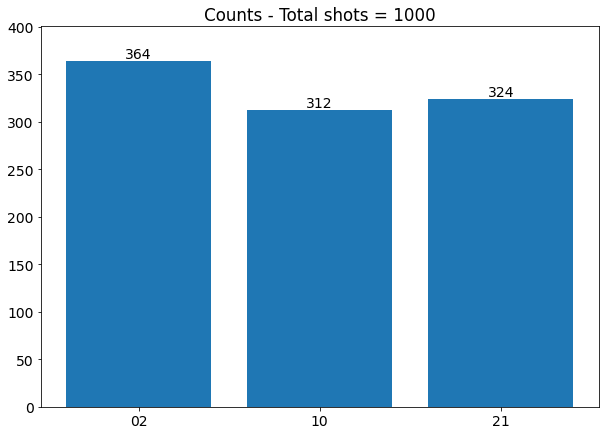

In [13]:
simple.measure(f_size = 14)

In [14]:
om = np.exp(1j * 2 * np.pi / 3)
xp1 = np.array([[0, 0, 1], [1, 0, 0], [0, 1, 0]])
np.linalg.eig(xp1)[1]

array([[-0.28867513+0.5j, -0.28867513-0.5j, -0.57735027+0.j ],
       [ 0.57735027+0.j ,  0.57735027-0.j , -0.57735027+0.j ],
       [-0.28867513-0.5j, -0.28867513+0.5j, -0.57735027+0.j ]])

In [15]:
import matplotlib.pyplot as plt
# plt.scatter(range(1, 11), 2**(np.linspace(1, 10, 10) - 1) + 1 )
print(range(1, 11), 3**(np.linspace(1, 10, 10) - 1) + 1 - 2**(np.linspace(1, 10, 10) - 1) + 1)
# plt.show()

range(1, 11) [2.0000e+00 3.0000e+00 7.0000e+00 2.1000e+01 6.7000e+01 2.1300e+02
 6.6700e+02 2.0610e+03 6.3070e+03 1.9173e+04]


In [16]:
yp1 = xp1 @ np.array([[1, 0, 0], [0, om, 0], [0, 0, om**2]]) * 2 * om

In [17]:
np.round(np.linalg.eig(yp1)[1], 6)

array([[-0.288675+0.5j,  0.57735 -0.j ,  0.57735 +0.j ],
       [ 0.57735 +0.j ,  0.57735 +0.j , -0.288675+0.5j],
       [ 0.57735 +0.j , -0.288675+0.5j,  0.57735 +0.j ]])

In [18]:
2 * om + 1

(4.440892098500626e-16+1.7320508075688774j)

# Quantum Phase Estimation

In [19]:
gate = np.array([[1, 0, 0], [0, 1, 0], [0, 0, np.exp(np.pi / 3)]])
qpe = Qutrit(3)
qpe.XP1(2)
qpe.CU(gate, 0, 2)
qpe.CU(gate, 1, 2)
qpe.CU(gate, 1, 2)

# IQFT

qpe.H_DAG(1)
qpe.CP_DAG(2 * np.pi / 3, 1, 0)
qpe.H_DAG(0)

qpe.draw()

|0>————————— * —————————————————————————Pd(pi/1.5)—H_d—————
|0>——————————|—————— * ————— * —H_d————— * —————————
|0>—X+1—————C_U—————C_U—————C_U—————————————————————


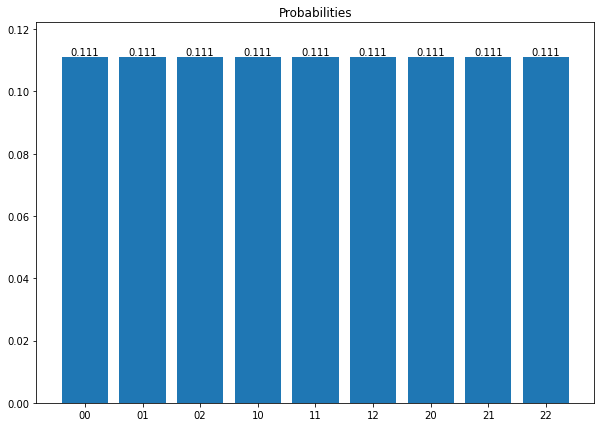

In [20]:
qpe.get_probs(p_q = [0])

In [30]:
four = []
for i in range(9):
    for j in range(9):
        four.append(np.exp(2 * np.pi * 1j * i * j / 9))

array_to_latex((np.array(four).reshape(9, 9)) @ np.array([0, 0, 0, 0, 0, 0, 1, 0, 0]))

<IPython.core.display.Latex object>

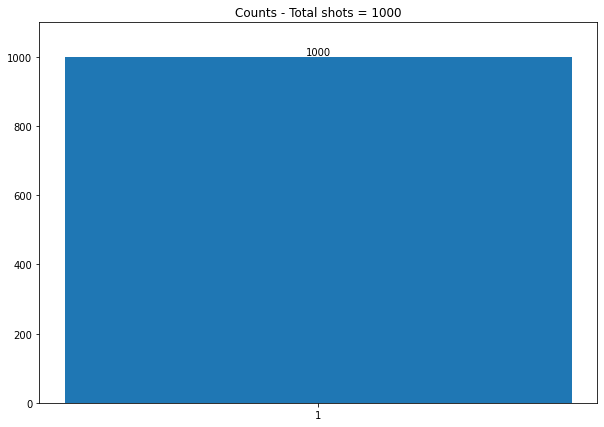

In [14]:
example = Qutrit(1)
example.XM1(0)
example.XM1(0)
example.measure()